<a href="https://colab.research.google.com/github/parasgupta1995/Almabetter-Capstone-project/blob/main/_telecom_churn_analysis_almabetter_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Telecom chrun and Region based Division of US state dataframe
df=pd.read_csv('/content/drive/MyDrive/Capstone project data/Python project/Telecom Churn.csv')
df2=pd.read_csv('/content/drive/MyDrive/Capstone project data/Python project/Copy of us state list regionwise - us state list regionwise.csv')

In [5]:
df=df.set_index('State').join(df2.set_index('State')).fillna('South')

In [6]:
df.reset_index(level=0, inplace=True)

In [7]:
df['State'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [8]:
df['calls minutes']=df.apply(lambda x: x['Total day minutes']+x['Total eve minutes']+x['Total night minutes']+x['Total intl minutes'],axis=1)

In [9]:
df['Total charge']=df.apply(lambda x: x['Total day charge']+x['Total eve charge']+x['Total night charge']+x['Total intl charge'],axis=1)

In [10]:
df['number of calls']=df.apply(lambda x:x['Total day calls']+x['Total eve calls']+x['Total night calls']+x['Total intl calls']+x['Customer service calls'],axis=1)

In [11]:
df.sort_values(by='State',inplace=True,ignore_index=True)

In [12]:
#dataframe of selected useful data only for calculating number of calls
Number_of_calls_dataframe=df.loc[:,['State', 'Account length', 'International plan', 'Voice mail plan','Number vmail messages', 'Total day calls', 'Total eve calls','Total night calls','Total intl calls', 'Customer service calls']]

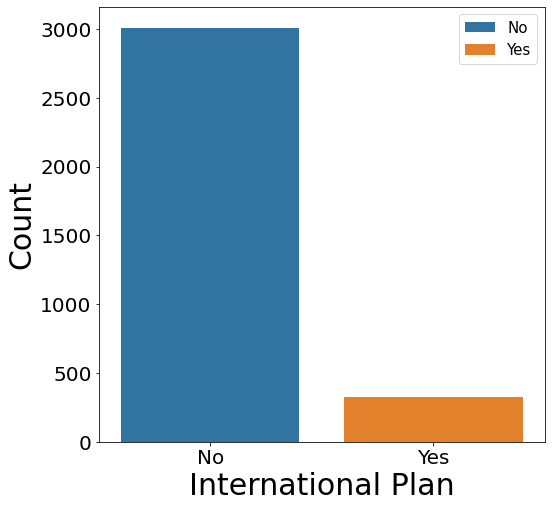

In [13]:
#People with no international plan and still making international calls can be potential customer for International plan
no_intl_plan_making_intlcalls=Number_of_calls_dataframe.groupby(by='International plan')['Account length'].count().reset_index()
plt.figure(figsize=(8,8))
sns.barplot(x='International plan',y='Account length',data=no_intl_plan_making_intlcalls,hue='International plan',dodge=False)
plt.xlabel("International Plan",size=30)
plt.xticks(size=20)
plt.ylabel("Count",size=30)
plt.yticks(size=20)
plt.legend(fontsize=15)